In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/onlinefoods.xlsx')

In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Pin code,Feedback
0,20,Female,Single,Student,Post Graduate,4,560001,Positive
1,24,Female,Single,Student,Graduate,3,560009,Positive
2,22,Male,Single,Student,Post Graduate,3,560017,Negative
3,22,Female,Single,Student,Graduate,6,560019,Positive
4,22,Male,Single,Student,Post Graduate,4,560010,Positive


In [ ]:
# Convert categorical columns into dummy variables, dropping the first to avoid the dummy variable trap
df= pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Feedback'], drop_first=True)

# Display the first few rows of the transformed dataframe
df.head()


,Age,Family size,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated,Feedback_Positive
0,20,4,560001,False,False,True,True,True,False,True
1,24,3,560009,False,False,True,True,False,False,True
2,22,3,560017,True,False,True,True,True,False,False
3,22,6,560019,False,False,True,True,False,False,True
4,22,4,560010,True,False,True,True,True,False,True


In [ ]:


df = df.astype(int)


In [ ]:
df.head()

,Age,Family size,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated,Feedback_Positive
0,20,4,560001,0,0,1,1,1,0,1
1,24,3,560009,0,0,1,1,0,0,1
2,22,3,560017,1,0,1,1,1,0,0
3,22,6,560019,0,0,1,1,0,0,1
4,22,4,560010,1,0,1,1,1,0,1


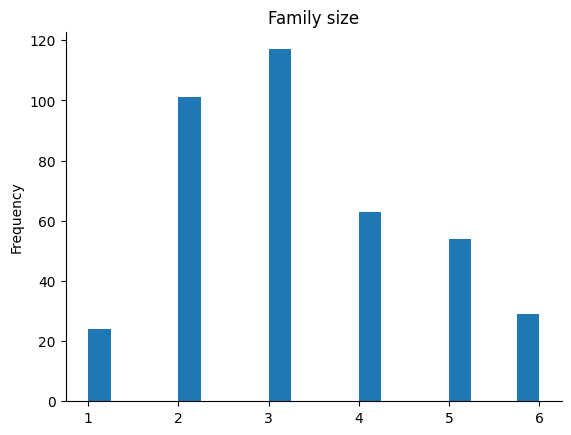

In [ ]:
# @title Family size

from matplotlib import pyplot as plt
df['Family size'].plot(kind='hist', bins=20, title='Family size')
plt.gca().spines[['top', 'right',]].set_visible(False)

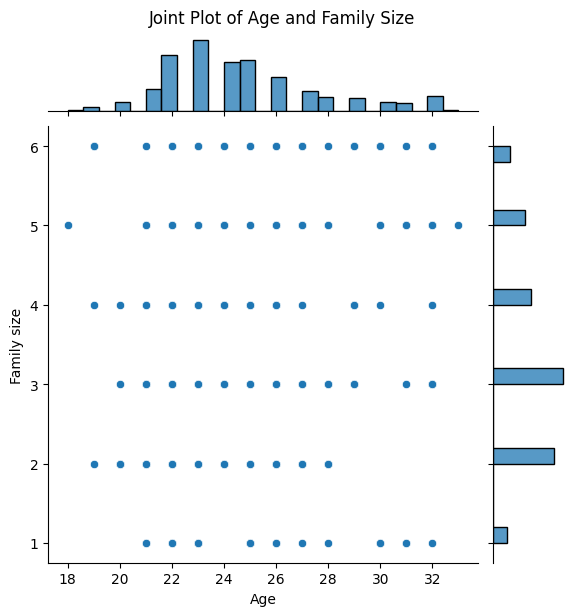

In [ ]:
# Create a joint plot for 'Age' and 'Family size'
sns.jointplot(x='Age', y='Family size', data=df, kind="scatter", marginal_kws=dict(bins=25, fill=True))

plt.suptitle('Joint Plot of Age and Family Size', y=1.02)  # Adjust title position
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       388 non-null    int64
 1   Family size                               388 non-null    int64
 2   Pin code                                  388 non-null    int64
 3   Gender_Male                               388 non-null    int64
 4   Marital Status_Prefer not to say          388 non-null    int64
 5   Marital Status_Single                     388 non-null    int64
 6   Occupation_Student                        388 non-null    int64
 7   Educational Qualifications_Post Graduate  388 non-null    int64
 8   Educational Qualifications_Uneducated     388 non-null    int64
 9   Feedback_Positive                         388 non-null    int64
dtypes: int64(10)
memory usage: 30.4 KB


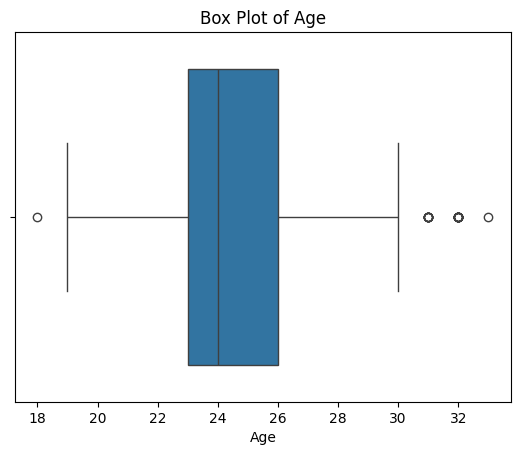

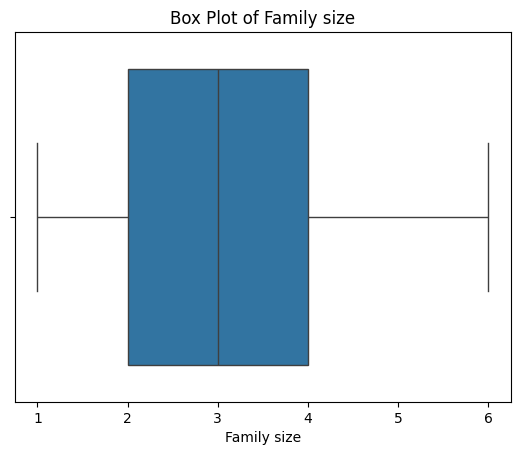

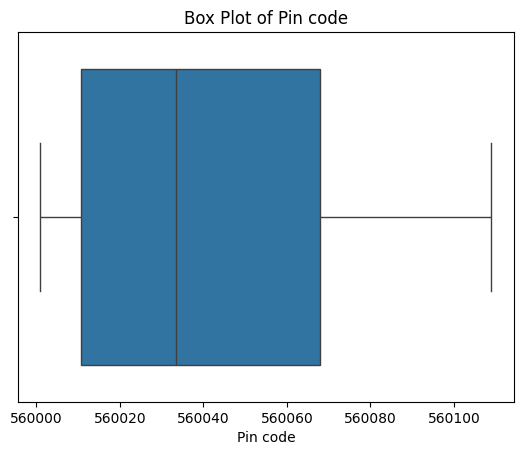

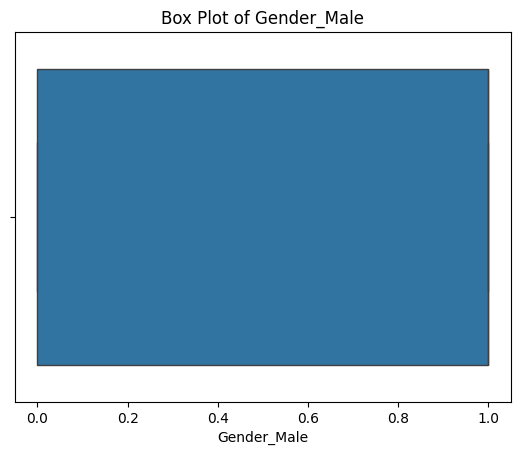

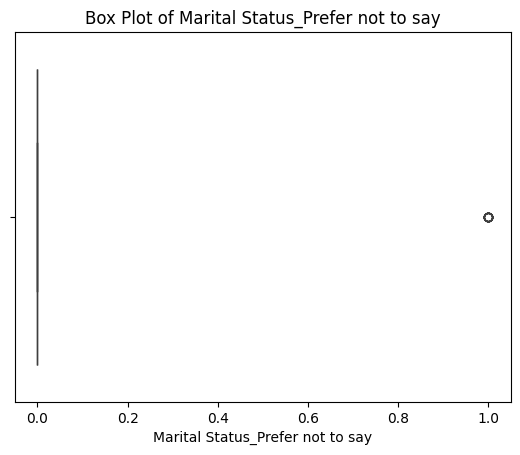

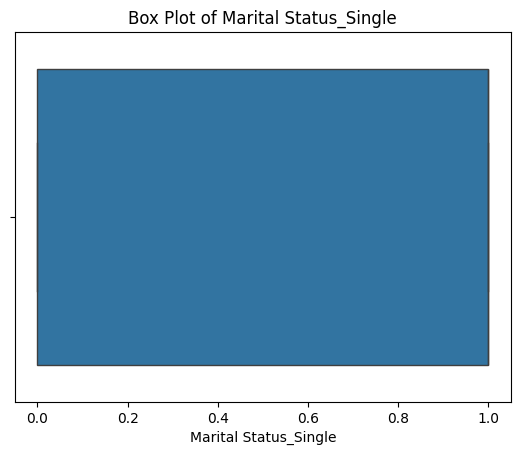

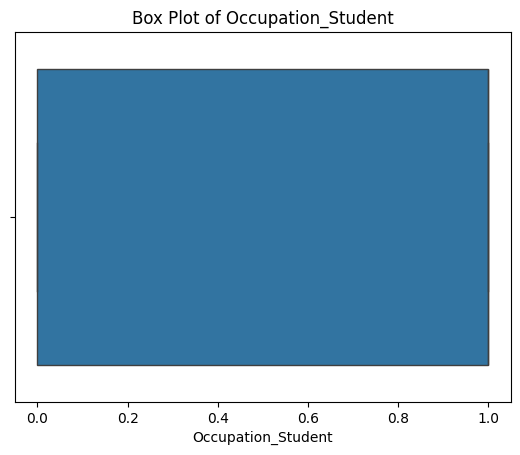

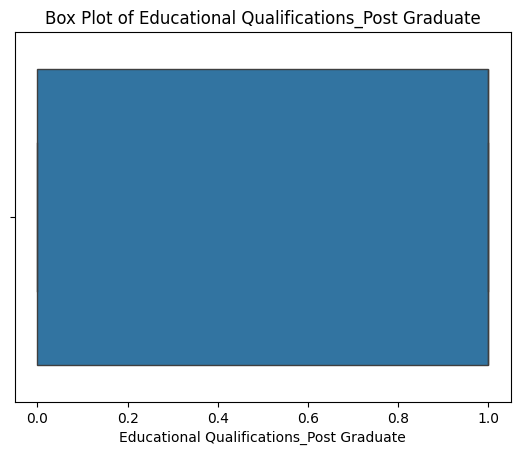

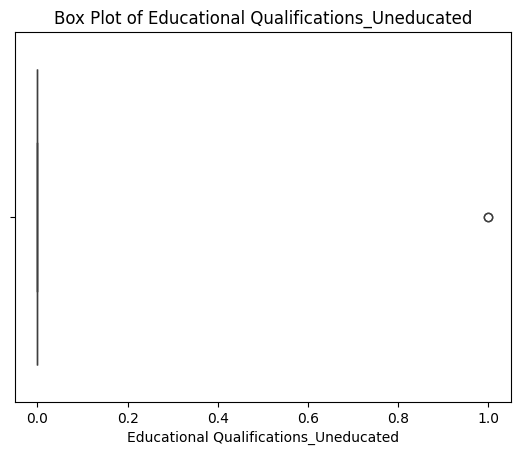

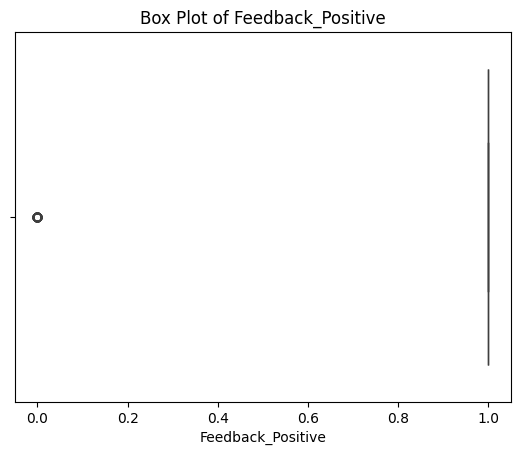

In [ ]:


# Create a box plot for each numerical column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()


In [ ]:


df = df.drop('Pin code', axis=1)
df.head()

,Age,Family size,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated,Feedback_Positive
0,20,4,0,0,1,1,1,0,1
1,24,3,0,0,1,1,0,0,1
2,22,3,1,0,1,1,1,0,0
3,22,6,0,0,1,1,0,0,1
4,22,4,1,0,1,1,1,0,1


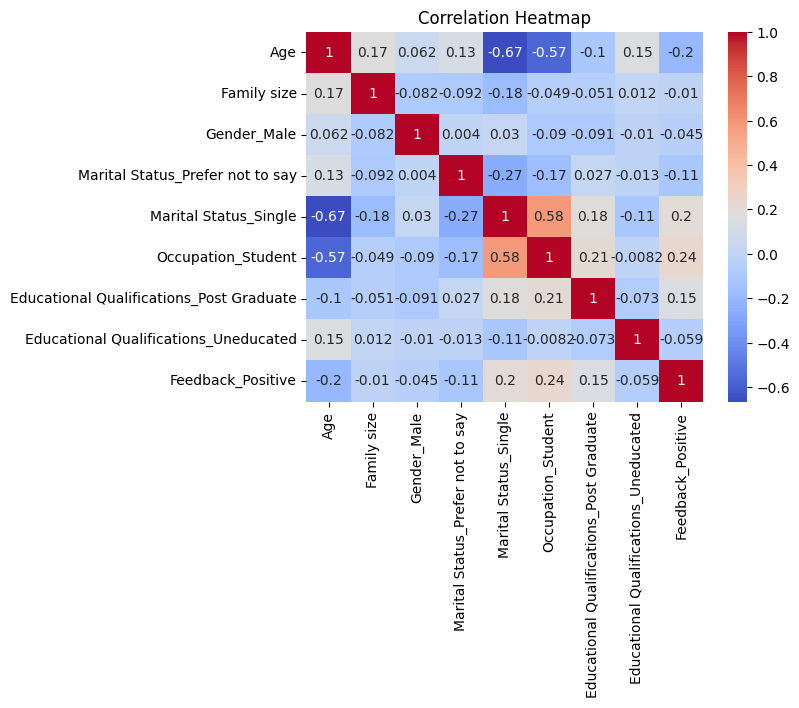

In [ ]:


# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('Feedback_Positive', axis=1)
y = df['Feedback_Positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_train_pred= classifier.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score for test data:', accuracy_score(y_test, y_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred))

# Evaluate the model on the training set
y_train_pred = classifier.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred))


Accuracy score for test data: 0.8205128205128205
Confusion matrix for test data:
 [[ 0 14]
 [ 0 64]]
Accuracy score for training data: 0.8161290322580645
Confusion matrix for training data:
 [[  0  57]
 [  0 253]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda.predict(X_test)
y_train_pred_lda = lda.predict(X_train)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_lda))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_lda))

# Evaluate the model on the training set
y_train_pred_lda = lda.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_lda))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_lda))


Accuracy score for test data: 0.8205128205128205
Confusion matrix for test data:
 [[ 0 14]
 [ 0 64]]
Accuracy score for training data: 0.8161290322580645
Confusion matrix for training data:
 [[  1  56]
 [  1 252]]


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_train_pred_knn = knn.predict(X_train_scaled)

# Evaluate the KNN model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn))

# Evaluate the KNN model on the training set
y_train_pred_knn = knn.predict(X_train_scaled)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_knn))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_knn))


Accuracy score for test data: 0.7692307692307693
Confusion matrix for test data:
 [[ 3 11]
 [ 7 57]]
Accuracy score for training data: 0.8516129032258064
Confusion matrix for training data:
 [[ 24  33]
 [ 13 240]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_knn_tuned = grid_search.predict(X_test_scaled)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn_tuned))


Best parameters: {'n_neighbors': 17}
Best score: 0.8193548387096774
Accuracy score for test data: 0.8076923076923077
Confusion matrix for test data:
 [[ 0 14]
 [ 1 63]]


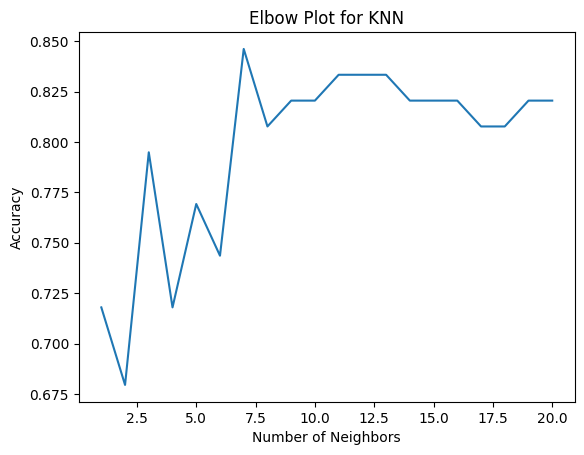

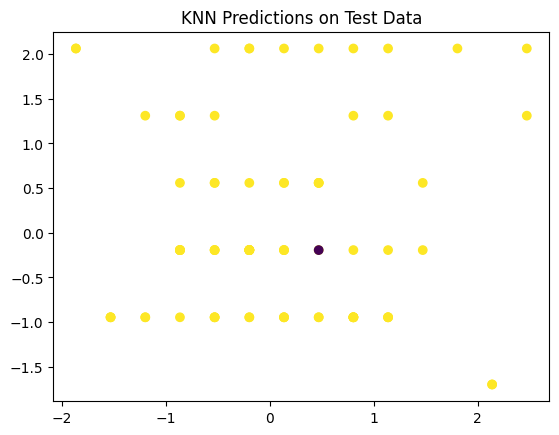

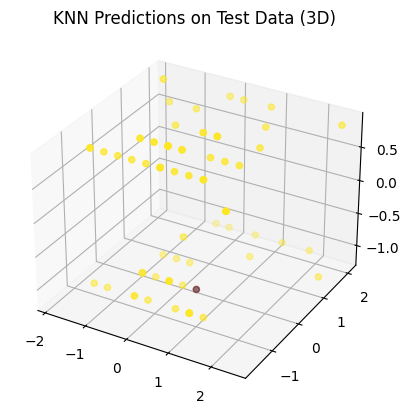

In [ ]:


# Elbow plot to find the optimal number of neighbors
k_range = range(1, 21)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Elbow Plot for KNN')
plt.show()

# Scatter plot of the data points colored by their predicted labels
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data')
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data (3D)')
plt.show()


Accuracy score for test data: 0.717948717948718
Confusion matrix for test data:
 [[ 5  9]
 [13 51]]
Accuracy score for training data: 0.9419354838709677
Confusion matrix for training data:
 [[ 49   8]
 [ 10 243]]
Best parameters: {'max_depth': 1}
Best score: 0.8161290322580645
Accuracy score for test data: 0.8205128205128205
Confusion matrix for test data:
 [[ 0 14]
 [ 0 64]]


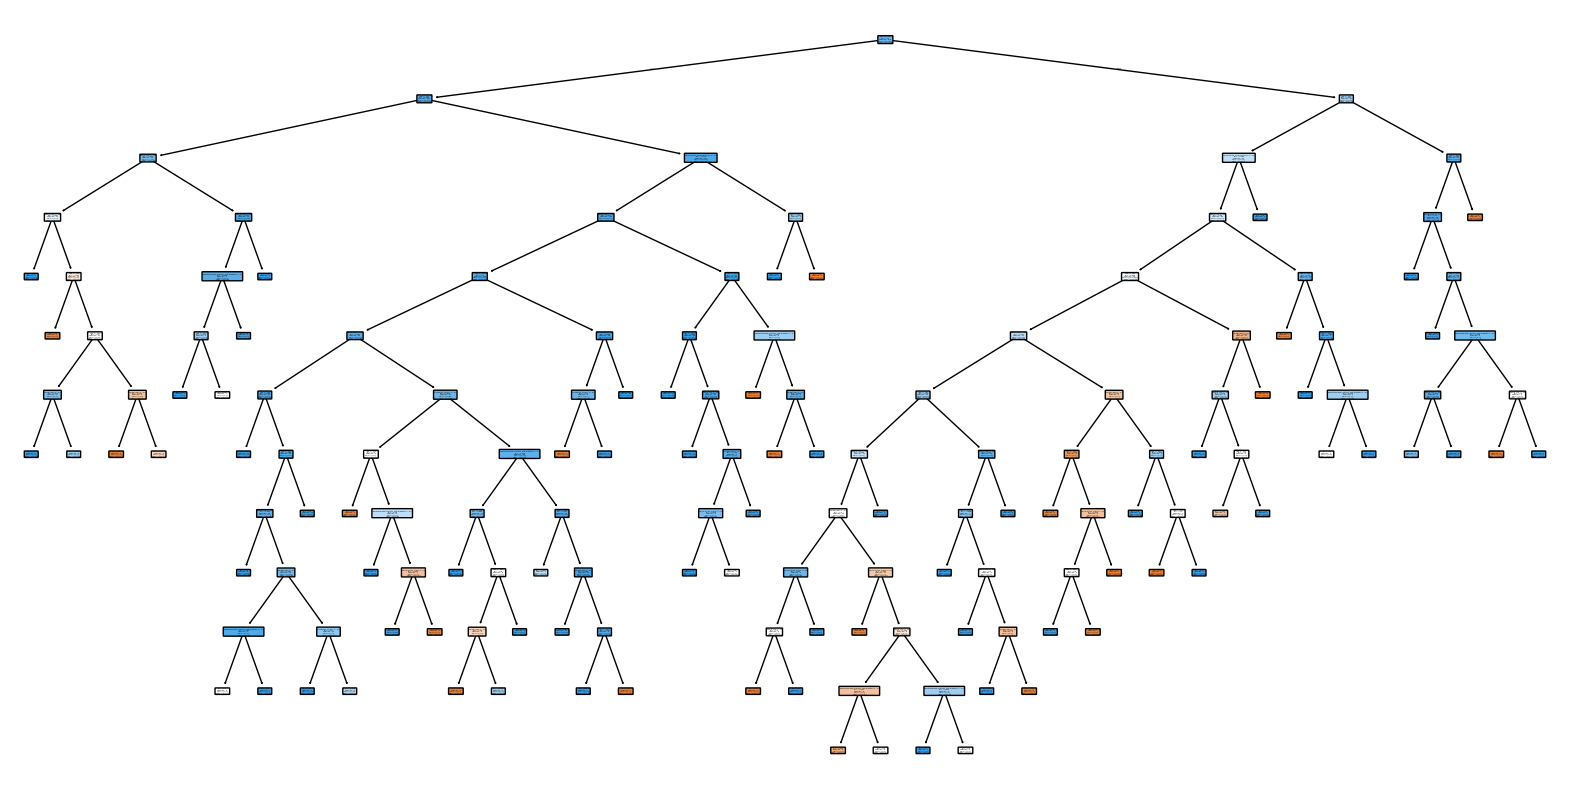

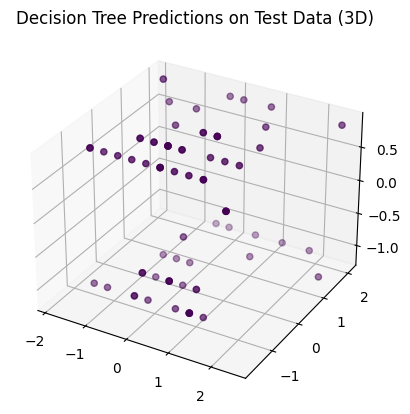

In [ ]:


# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the decision tree to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the Decision Tree model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree))

# Evaluate the Decision Tree model on the training set
y_train_pred_dtree = dtree.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_dtree))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_dtree))


# Perform grid search cross-validation to find the optimal hyperparameters
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_dtree_tuned = grid_search.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_tuned))


# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_dtree_tuned)
plt.title('Decision Tree Predictions on Test Data (3D)')
plt.show()

Accuracy score for test data: 0.8205128205128205
Confusion matrix for test data:
 [[ 0 14]
 [ 0 64]]


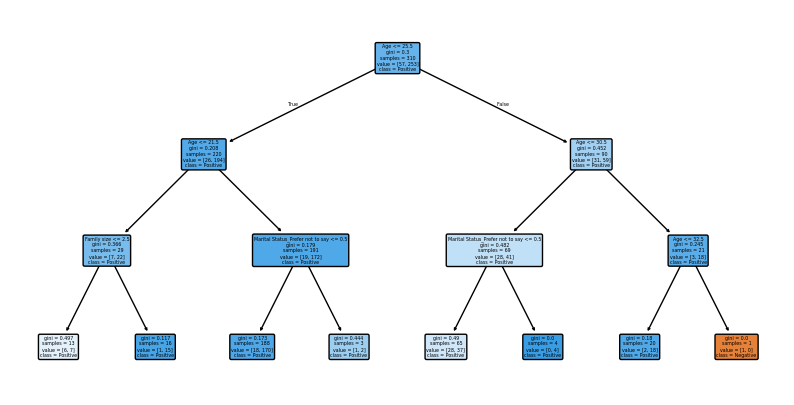

In [ ]:


# Prune the decision tree to a maximum depth of 3
dtree_pruned = DecisionTreeClassifier(max_depth=3)

# Fit the pruned tree to the training data
dtree_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree_pruned = dtree_pruned.predict(X_test)

# Evaluate the pruned tree on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_pruned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(10,5))
plot_tree(dtree_pruned, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()


In [ ]:


# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Fit the random forest to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf))

# Evaluate the Random Forest model on the training set
y_train_pred_rf = rf.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf))



Accuracy score for test data: 0.782051282051282
Confusion matrix for test data:
 [[ 5  9]
 [ 8 56]]
Accuracy score for training data: 0.9419354838709677
Confusion matrix for training data:
 [[ 43  14]
 [  4 249]]


In [ ]:


# Use GridSearchCV to find the optimal hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the Random Forest model with the best parameters
rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf_tuned))

# Evaluate the model on the training set
y_train_pred_rf_tuned = rf_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf_tuned))


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 0.8161290322580645
Accuracy score for test data: 0.8205128205128205
Confusion matrix for test data:
 [[ 0 14]
 [ 0 64]]
Accuracy score for training data: 0.8161290322580645
Confusion matrix for training data:
 [[  0  57]
 [  0 253]]


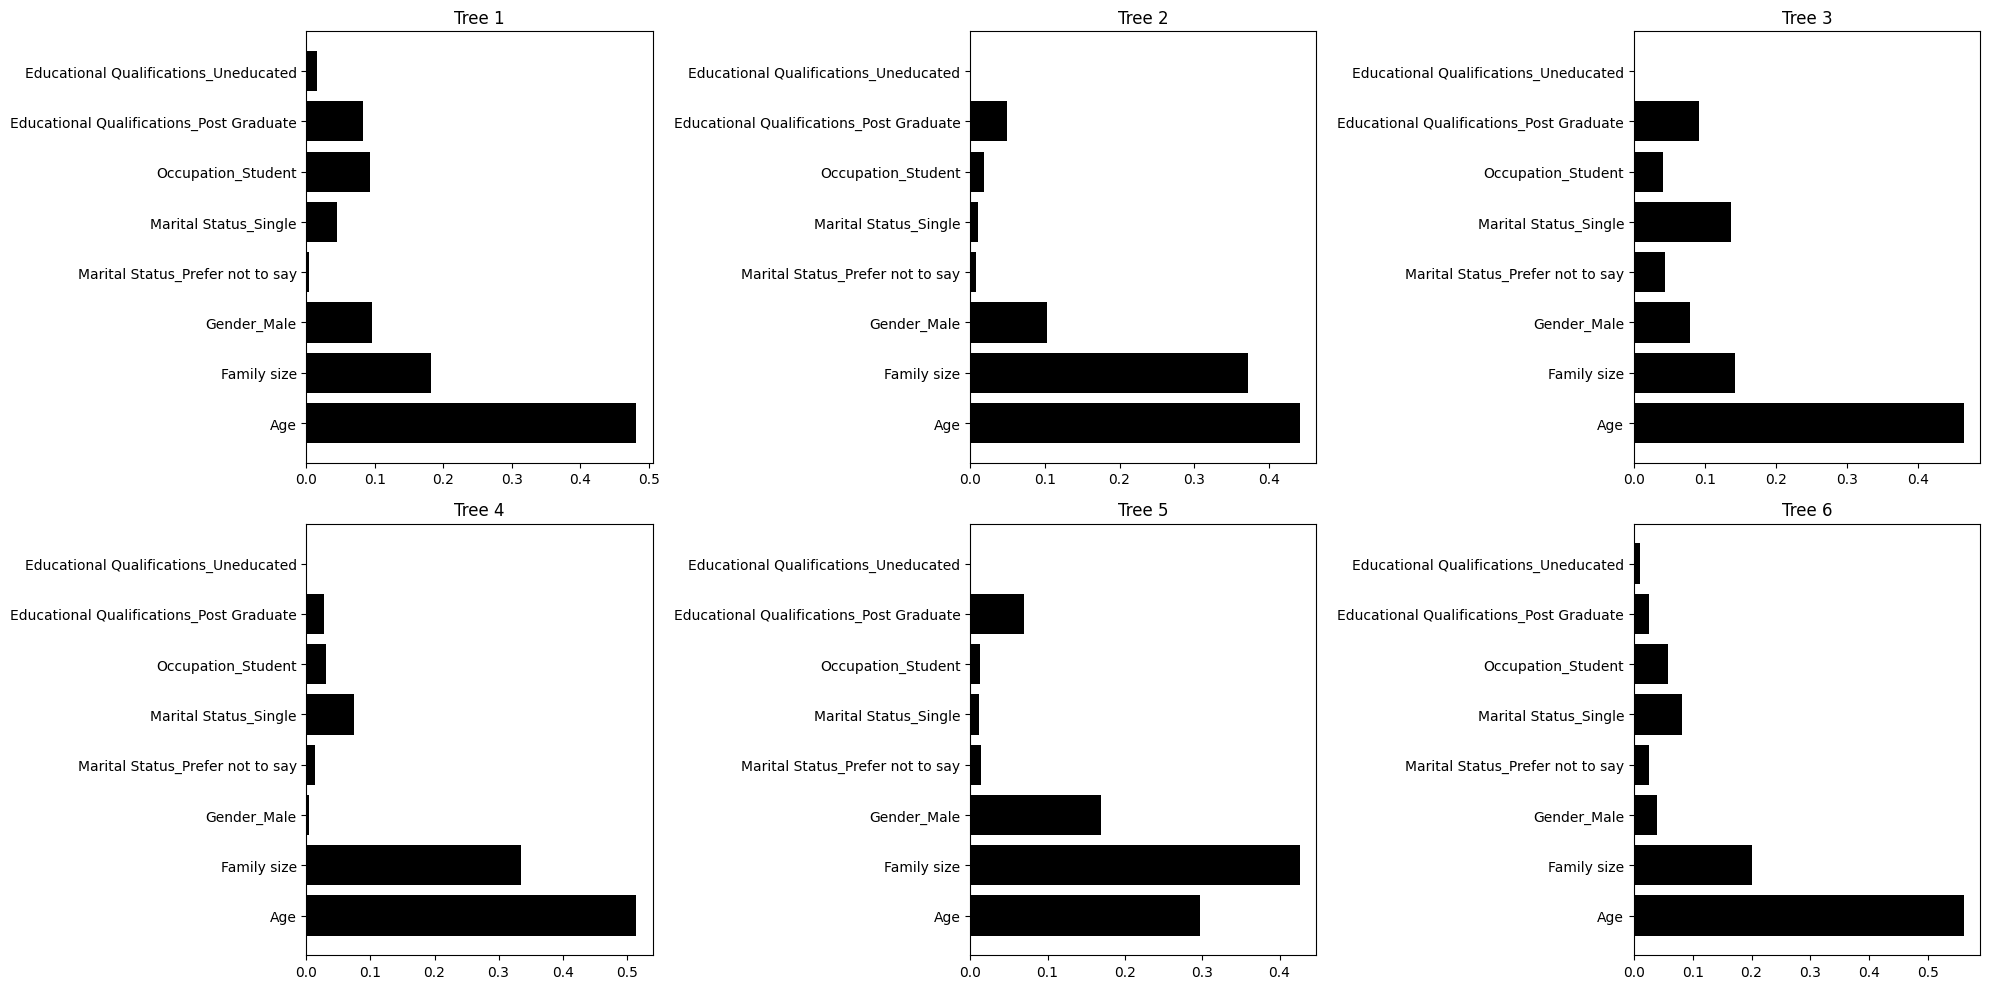

In [ ]:
# prompt: generate a visual of random forest

import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot the feature importances for each tree in the forest
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
  ax.barh(X.columns, tree.feature_importances_, color='black', align='center')
  ax.set_title(f'Tree {i + 1}')

# Tight layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:


from xgboost import XGBClassifier

# Create an XGBoost classifier object
xgb = XGBClassifier()

# Fit the XGBoost model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb))

# Evaluate the XGBoost model on the training set
y_train_pred_xgb = xgb.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb))

# Use GridSearchCV to find the optimal hyperparameters for the XGBoost model
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the XGBoost model with the best parameters
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb_tuned))

# Evaluate the model on the training set
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb_tuned))


Accuracy score for test data: 0.8076923076923077
Confusion matrix for test data:
 [[ 5  9]
 [ 6 58]]
Accuracy score for training data: 0.932258064516129
Confusion matrix for training data:
 [[ 41  16]
 [  5 248]]
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.7}
Best score: 0.8161290322580645
Accuracy score for test data: 0.782051282051282
Confusion matrix for test data:
 [[ 4 10]
 [ 7 57]]
Accuracy score for training data: 0.9290322580645162
Confusion matrix for training data:
 [[ 40  17]
 [  5 248]]
